In [458]:
import os
import re
import csv
import us
import math
import numpy as np
import pandas as pd
from textblob import Word, TextBlob
from operator import itemgetter
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

location = "C:\\Users\\Telahun\\Documents\\School\\CSE 632\\DataMining\\Project1\\"

In [545]:
# stop_words = stopwords.words('english')

states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [362]:
def standardDevNormalization(array):
    '''
    Normalization function used in homework 1.
    '''
    result = []
    vstd = array.std()
    vmean = array.mean()
    
    for i, v_i in enumerate(array):
        result.append((v_i - vmean)/vstd)
        
    return result

In [428]:
def getSentiment(text):
    '''
    cleaning the text so there are no special characters or stop words
    '''
    
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", text).split())
    text = TextBlob(text).word_counts.items()
    text = ' '.join([word[0] for word in text])
    print(text)
    sentiment = TextBlob(text).sentiment.polarity
    
    if sentiment > 0:
        return 'positive'
    elif sentiment == 0:
        return 'neutral'
    else:
        return 'negative'

In [541]:
def validState(location):
    location = str(location)
    locationText = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", location).split()
    realLocation = ''
    for loc in locationText:
        state = str(us.states.lookup(str(loc)))
        if state != "None":
            realLocation =  str(us.states.lookup(loc).abbr).strip()
    if realLocation != '':
        return realLocation
    else:
        return np.nan

In [429]:
TextBlob("Hello @#$FAk I like cats I cats").sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [430]:
getSentiment("Hello @#$FAk I like cats I cats")

hello fak i like cats


'neutral'

In [419]:
' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", "Hello @#$FAk I like cats I cats").split())

'Hello @#$FAk I like cats I cats'

In [2]:
pd.set_option('display.max_columns', 25)
pd.set_option('use_inf_as_na', True)
pd.set_option('display.max_colwidth', None)

In [56]:
location = "C:\\Users\\Telahun\\Documents\\School\\CSE 632\\DataMining\\Project1\\"
colorMap = 'Spectral'
COLOR = 'firebrick'
COLOR2 = 'mediumaquamarine'
COLOR3 = 'darkcyan'

In [407]:
df = pd.read_csv(location+"reelection.csv")#, index_col='id_str')#, error_bad_lines=False)

C:\Users\Telahun\Anaconda3\envs\dmg\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (2,3,10,11,13,40,41,54,55,57,83,86,87,93,94,95,96,122,125,126,128,129,142,143,144,145,171,174,175,181,182,193,194,195,196,197,198,199,200,201,211,212,213,214,215,242,243,255,256,257,258,259,285,288,289,294,295,296,297,324,327,328,330,331,343,344,345,346,373,376,377,385,393,394,395,396,397,398,399,400,401,451,467,468,469,470,471,472,473,476,477,478,480,483,486,489,495,496,498,499,511,512,513,514,515,516,517,520,521,522,524,527,530,533,539,540,541,544,545,550,551,552,553,580,583,584,586,587,599,600,601,602,629,632,633,665,666,667,668,669,670,708,709,710,711,737,740,741,746,747,748,749,776,779,780,793,794,795,796,823,826,827,835,843,844,845,846,847,848,849,850,851,891,901,910,953,997) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [408]:
headers = ['lang',  'created_at', 'text', 
           'user.id_str', 'user.name', 'user.screen_name', 'user.created_at', 'user.statuses_count',
           'user.location', 'user.verified', 'user.followers_count', 'user.friends_count', 
           'user.listed_count']#'id_str',
#            'coordinates', 'place',
#            'quoted_status.id_str', 'extended_tweet.full_text', 'entities.hashtags.', 
#            'entities.symbols.', 'geo', 'retweet_count']
# df = df.set_index('id_str')

In [415]:
len(dff.dropna(subset=['user.location']))

43583

In [6]:
df.head(1)

,contributors,coordinates,coordinates.coordinates.,coordinates.type,created_at,display_text_range.,entities.hashtags.,entities.hashtags.hashtags.indices.,entities.hashtags.hashtags.text,entities.media.media.additional_media_info.description,entities.media.media.additional_media_info.embeddable,entities.media.media.additional_media_info.monetizable,...,user.profile_sidebar_fill_color,user.profile_text_color,user.profile_use_background_image,user.protected,user.screen_name,user.statuses_count,user.time_zone,user.translator_type,user.url,user.utc_offset,user.verified,withheld_in_countries.
0,NaN,NaN,NaN,NaN,Fri Aug 14 15:31:42 +0000 2020,NaN,NaN,"87, 92",ガルフレ,NaN,NaN,NaN,...,DDEEF6,333333,True,False,ususio514,20,NaN,none,NaN,NaN,False,NaN


In [410]:
df.dropna()

,contributors,coordinates,coordinates.coordinates.,coordinates.type,created_at,display_text_range.,entities.hashtags.,entities.hashtags.hashtags.indices.,entities.hashtags.hashtags.text,entities.media.media.additional_media_info.description,entities.media.media.additional_media_info.embeddable,entities.media.media.additional_media_info.monetizable,...,user.profile_sidebar_fill_color,user.profile_text_color,user.profile_use_background_image,user.protected,user.screen_name,user.statuses_count,user.time_zone,user.translator_type,user.url,user.utc_offset,user.verified,withheld_in_countries.


In [7]:
# list(df.columns)[0:500]

In [8]:
# list(df.columns)[500:]

In [9]:
dff = df[headers]

#### Ratios

In [361]:
dff['user.ratio'] = dff['user.followers_count']/dff['user.friends_count'].astype(float)
dff['user.ratio'] = dff['user.ratio'].dropna()
dff['user.ratio'] = dff['user.ratio'].round(4)

dff['user.ratio.normalized'] = standardDevNormalization(dff['user.ratio'])
dff['user.ratio.normalized'] = dff['user.ratio.normalized'].round(4)

#### Sentiment

In [405]:
dff['sentiment'] = dff.apply(lambda x: getSentiment(x['text']), axis=1)

#### States

In [524]:
dff['user.location.abbr'] = dff.apply(lambda x: validState(x['user.location']), axis=1)

In [11]:
# dff[dff.isnull().any(axis=1)]

In [12]:
dff.head(1)

,lang,created_at,text,user.id_str,user.name,user.screen_name,user.created_at,user.statuses_count,user.location,user.verified,user.followers_count,user.friends_count,user.listed_count,user.ratio
0,ja,Fri Aug 14 15:31:42 +0000 2020,【ガールフレンド（仮）】2020マドンナ選抜総選挙開催中！↵たくさん投票して、あなたの手でお気に入りのガールを1位にしよう♪↵https://t.co/EBej3RKyFQ↵#ガルフレ↵https://t.co/RdXBSSa7uJ,1287702154153586689,うすしお,ususio514,Mon Jul 27 10:51:50 +0000 2020,20,"Sagamihara, Kanagawa, Japan",False,0,1,0,0.0


In [13]:
print("Row Count: {}".format(len(dff)))

Row Count: 71662


In [14]:
## drop tweets that are empty but safe (want to keep location if possiblity of processing)
dff = dff.dropna(subset=['lang', 'text', 'user.ratio', 'user.friends_count', 'user.listed_count', 'user.verified', ])
print("Row Count: {}".format(len(dff)))

## ratios less than 0.000 dont make sense (i.e. they are a bot account)
dff = dff[dff['user.ratio'] > 0.000]
print("Row Count: {}".format(len(dff)))

## drop duplicates based on same tweet from same person (not same tweet)
dff = dff.drop_duplicates(subset=['text', 'user.id_str', 'user.screen_name'])
print("Row Count: {}".format(len(dff)))

Row Count: 71484
Row Count: 71157
Row Count: 70897


### Summary infos

In [15]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70897 entries, 1 to 71661
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lang                  70897 non-null  object 
 1   created_at            70897 non-null  object 
 2   text                  70897 non-null  object 
 3   user.id_str           70897 non-null  int64  
 4   user.name             70897 non-null  object 
 5   user.screen_name      70897 non-null  object 
 6   user.created_at       70897 non-null  object 
 7   user.statuses_count   70897 non-null  int64  
 8   user.location         44999 non-null  object 
 9   user.verified         70897 non-null  bool   
 10  user.followers_count  70897 non-null  int64  
 11  user.friends_count    70897 non-null  int64  
 12  user.listed_count     70897 non-null  int64  
 13  user.ratio            70897 non-null  float64
dtypes: bool(1), float64(1), int64(5), object(7)
memory usage: 7.6+ MB


In [16]:
dff.describe().dropna(axis='columns')

,user.id_str,user.statuses_count,user.followers_count,user.friends_count,user.listed_count,user.ratio
count,7.089700e+04,7.089700e+04,7.089700e+04,70897.000000,70897.000000,70897.000000
mean,4.114360e+17,6.961133e+04,7.699496e+03,3567.073289,65.640126,8.433148
std,5.135051e+17,1.148708e+05,1.478626e+05,9940.487563,924.705670,316.158119
min,1.033000e+03,1.000000e+00,1.000000e+00,1.000000,0.000000,0.000700
25%,2.506001e+08,7.990000e+03,1.590000e+02,334.000000,0.000000,0.352600
50%,2.549649e+09,2.854500e+04,7.070000e+02,1075.000000,2.000000,0.717000
75%,9.197546e+17,8.329300e+04,2.969000e+03,3735.000000,15.000000,1.005700
max,1.294326e+18,3.591551e+06,2.223350e+07,544497.000000,120837.000000,59437.000000


In [17]:
dff.nunique()

lang                       38
created_at               9498
text                    17198
user.id_str             48137
user.name               45495
user.screen_name        48138
user.created_at         48129
user.statuses_count     50433
user.location           12877
user.verified               2
user.followers_count    11299
user.friends_count       9905
user.listed_count        1194
user.ratio              18656
dtype: int64

In [18]:
dff["user.location"].value_counts()

United States                      2655
USA                                1239
California, USA                     808
Florida, USA                        714
Texas, USA                          649
                                   ... 
Outside 495 DMV                       1
❤️ in BHX, KIN, YUL, ADD & SJO.       1
Senate District 26                    1
the Field                             1
Somewhere west of Nowhere             1
Name: user.location, Length: 12877, dtype: int64

In [19]:
## without en filter
df1 = dff

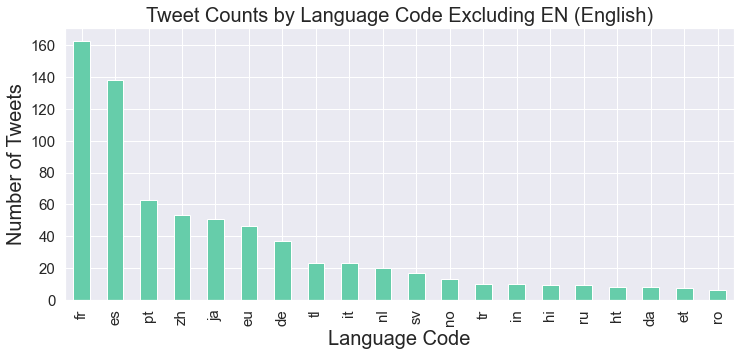

In [359]:
ax = df1[~df1["lang"].isin(['en', 'und'])].lang.value_counts().head(20).plot.bar(figsize=(12,5), color=COLOR2)
# ax = a["lang"].value_counts().head(20).plot.bar(figsize=(12,5), colormap='Spectral')
ax.set_title('Tweet Counts by Language Code Excluding EN (English)')
ax.title.set_size(20)
ax.tick_params(labelsize=15)
ax.set_xlabel('Language Code', fontsize=20)
ax.set_ylabel('Number of Tweets',fontsize=20)
plt.show()

In [283]:
## RESET DFF BACK TO ALL LANGUAGES
dff =df1

## EN Language Only

In [284]:
## literacally cant read/understand other languages :c
dff = dff[dff['lang']== 'en']
dff = dff.reset_index(drop=True)
print("Row Count: {}".format(len(dff)))

Row Count: 68601


In [285]:
dff['user.verified'] = dff['user.verified'].apply({False:'Not Verified', True:'Verified'}.get)

In [286]:
dff['user.verified'].value_counts()

Not Verified    67394
Verified         1207
Name: user.verified, dtype: int64

## Some plots

### - Verified

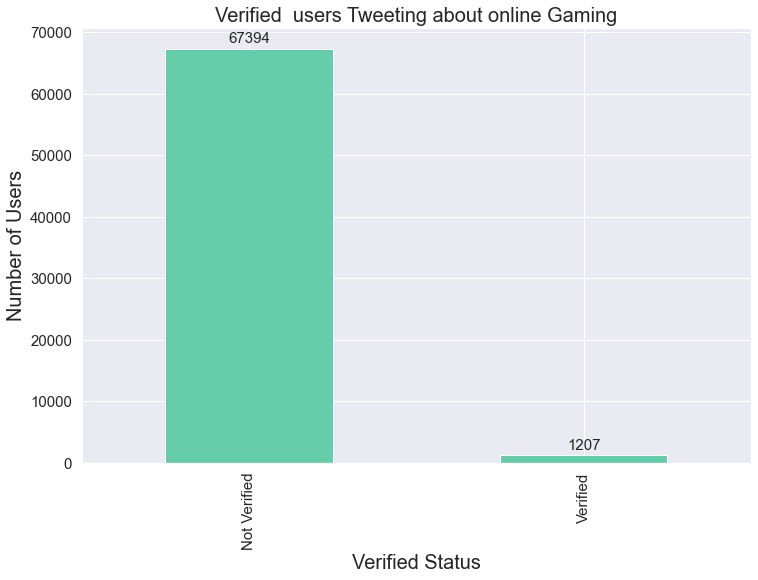

In [287]:
ax = dff['user.verified'].value_counts().plot.bar(figsize=(12,8), color=COLOR2)
for p in ax.patches:
    ax.annotate( p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=15)
#     ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points')

ax.set_title('Verified Status of Users Tweeting about Election')
ax.title.set_size(20)
ax.tick_params(labelsize=15)
ax.set_xlabel('Verified Status', fontsize=20)
ax.set_ylabel('Number of Users',fontsize=20)
plt.show()

<ipython-input-356-f5866f8a22d1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vv = dff[dff['user.ratio.normalized'].sort_values() < 0]


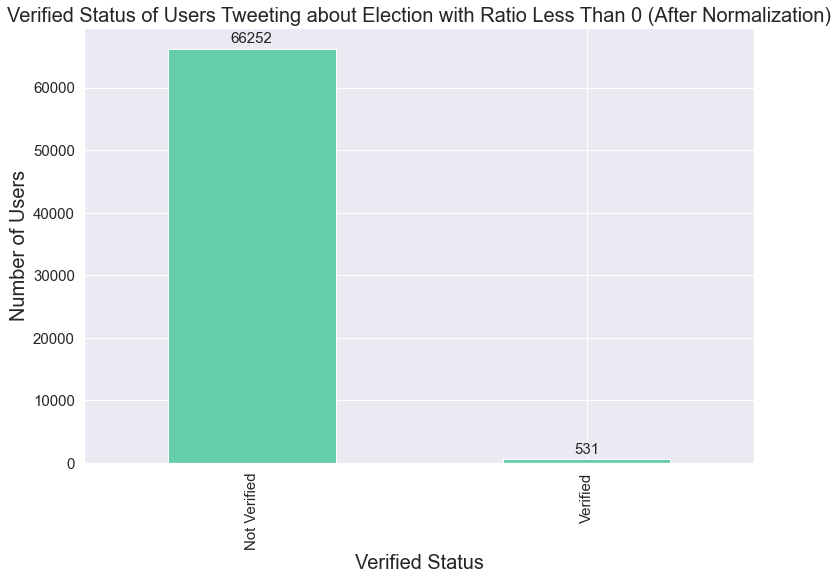

In [356]:
vv = dff[dff['user.ratio.normalized'].sort_values() < 0]

ax = vv['user.verified'].value_counts().plot.bar(figsize=(12,8), color=COLOR2)
for p in ax.patches:
    ax.annotate( p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=15)
#     ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points')

ax.set_title('Verified Status of Users Tweeting about Election with Ratio Less Than 0 (After Normalization)')
ax.title.set_size(20)
ax.tick_params(labelsize=15)
ax.set_xlabel('Verified Status', fontsize=20)
ax.set_ylabel('Number of Users',fontsize=20)
plt.show()

<ipython-input-357-5ff702336f3e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vv = dff[dff['user.ratio.normalized'].sort_values() > 0]


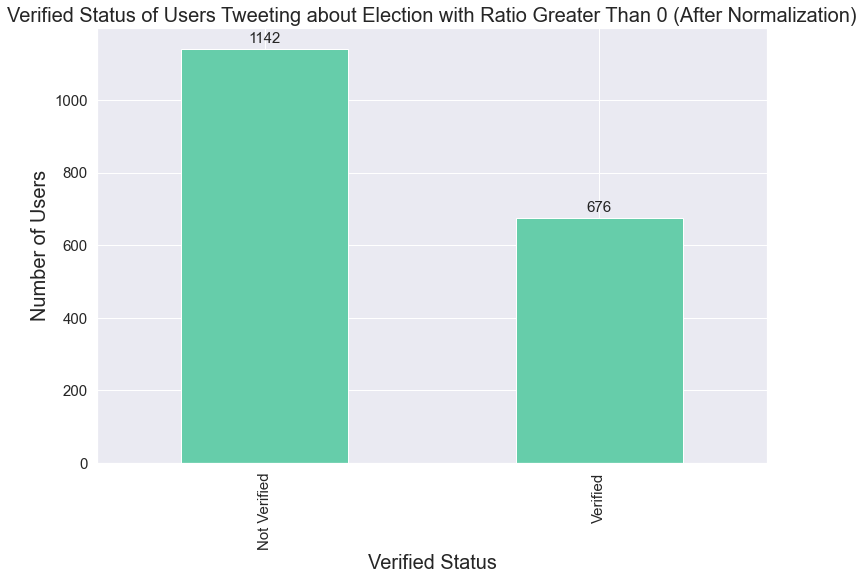

In [357]:
vv = dff[dff['user.ratio.normalized'].sort_values() > 0]

ax = vv['user.verified'].value_counts().plot.bar(figsize=(12,8), color=COLOR2)
for p in ax.patches:
    ax.annotate( p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=15)
#     ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points')

ax.set_title('Verified Status of Users Tweeting about Election with Ratio Greater Than 0 (After Normalization)')
ax.title.set_size(20)
ax.tick_params(labelsize=15)
ax.set_xlabel('Verified Status', fontsize=20)
ax.set_ylabel('Number of Users',fontsize=20)
plt.show()

In [360]:
dff['user.ratio.normalized'].sort_values()

41882     -0.026316
25901     -0.026313
53941     -0.026310
16239     -0.026309
13030     -0.026309
            ...    
52459     55.125269
61503     61.642795
35837     62.047390
52696     79.640204
45792    185.331040
Name: user.ratio.normalized, Length: 68601, dtype: float64

In [337]:
max(dff['user.ratio'])

59437.0

### - Ratio Plots

Row Count: 62663


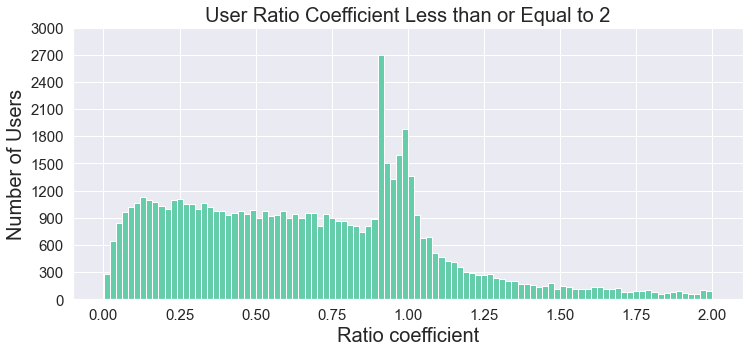

In [432]:
ratios = dff[dff['user.ratio'] > 0.000]
ratios = ratios[ratios['user.ratio'] <= 2]

print("Row Count: {}".format(len(ratios)))

ax = ratios['user.ratio'].hist(bins=100,figsize=(12,5), color=COLOR2)
ax.set_title('User Ratio Coefficient Less than or Equal to 2')
ax.title.set_size(20)
ax.tick_params(labelsize=15)
# ax.set_xticks(np.arange(0, 52, 2))
ax.set_yticks(np.arange(0, 3300, 300))
ax.set_xlabel('Ratio coefficient', fontsize=20)
ax.set_ylabel('Number of Users',fontsize=20)
plt.show()

In [438]:
len(ratios[ratios['user.ratio'] > 10])/len(dff)

0.008644188860220697

In [439]:
len(ratios[ratios['user.ratio'] > 10])

593

Row Count: 4935


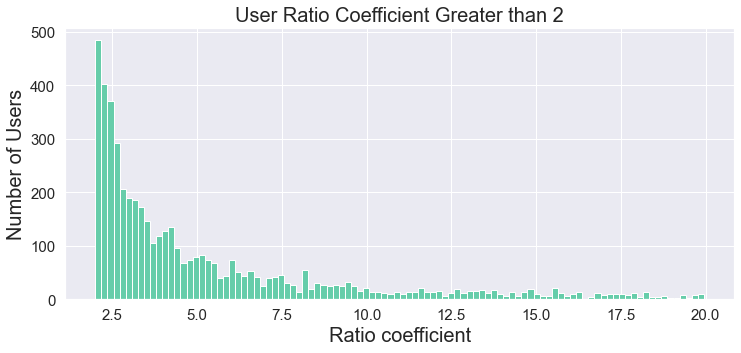

In [437]:
ratios = dff[dff['user.ratio'] > 2]
ratios = ratios[ratios['user.ratio'] <= 20]

print("Row Count: {}".format(len(ratios)))

ax = ratios['user.ratio'].hist(bins=100,figsize=(12,5), color=COLOR2)
ax.set_title('User Ratio Coefficient Greater than 2')
ax.title.set_size(20)
ax.tick_params(labelsize=15)
# ax.set_yticks(np.arange(0, 3000, 300))
ax.set_xlabel('Ratio coefficient', fontsize=20)
ax.set_ylabel('Number of Users',fontsize=20)
plt.show()

In [316]:
dff['user.ratio.normalized']

0       -0.999968
1       -0.999967
2       -0.999969
3       -0.999999
4       -0.999947
           ...   
68596   -0.999997
68597   -0.999988
68598   -0.999968
68599   -0.999978
68600   -0.999964
Name: user.ratio.normalized, Length: 68601, dtype: float64

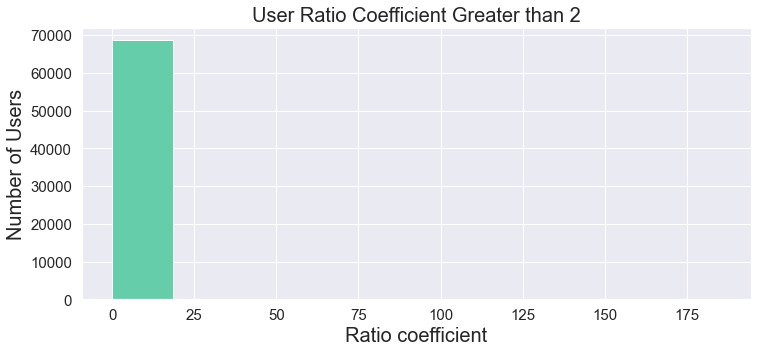

In [330]:
ax = dff['user.ratio.normalized'].hist(bins=10,figsize=(12,5), color=COLOR2)
ax.set_title('User Ratio Coefficient Greater than 2')
ax.title.set_size(20)
ax.tick_params(labelsize=15)
# ax.set_yticks(np.arange(0, 3000, 300))
ax.set_xlabel('Ratio coefficient', fontsize=20)
ax.set_ylabel('Number of Users',fontsize=20)
plt.show()

### - Followers vs Friends

- By default users with less than 1 friends and 1 followrs we will considered irrelevent. People with less than 5 followers/friends most likely exist but their influence on the stream of information should be low since their immediate impact at most can reach 1 person. The same can be said about 2 or 3 followers but the cut off may change later depeneding on analysis

Row Count: 11410


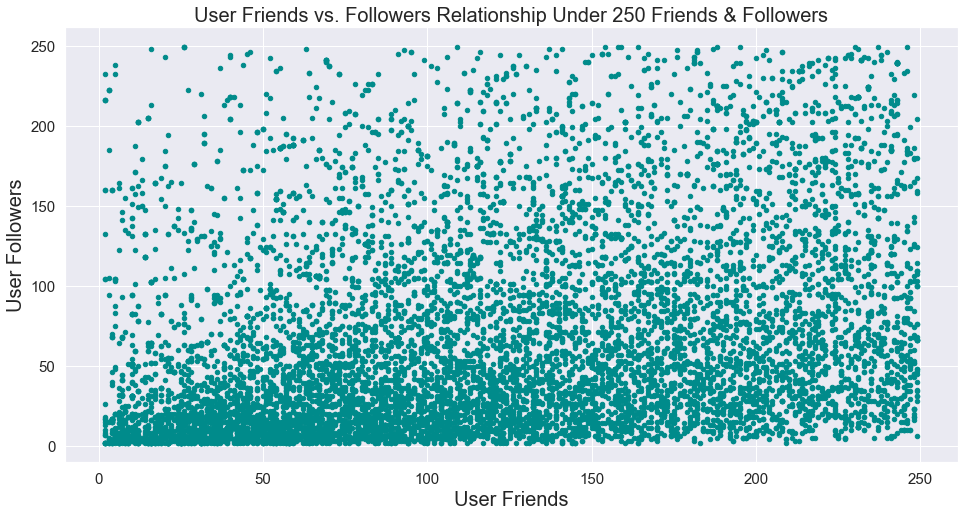

In [304]:
rr = dff[['user.friends_count', 'user.followers_count']]

rr = rr[rr['user.friends_count'] > 1]
rr = rr[rr['user.friends_count'] < 250]

rr = rr[rr['user.followers_count'] > 1]
rr = rr[rr['user.followers_count'] < 250]

print("Row Count: {}".format(len(rr)))

# ax = rr.plot(x='user.friends_count', y='user.followers_count', figsize=(16, 8))
ax = rr.plot.scatter(x='user.friends_count', y='user.followers_count', figsize=(16, 8), color=COLOR3)
ax.set_title('User Friends vs. Followers Relationship Under 250 Friends & Followers')
ax.title.set_size(20)
ax.tick_params(labelsize=15)
ax.set_xlabel('User Friends', fontsize=20)
ax.set_ylabel('User Followers',fontsize=20)
plt.show()

Row Count: 19629


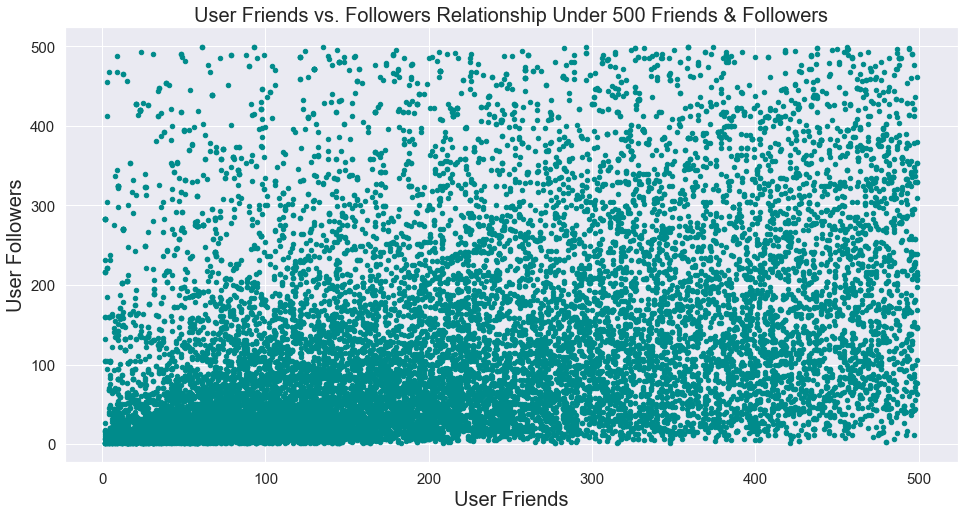

In [305]:
rr = dff[['user.friends_count', 'user.followers_count']]

rr = rr[rr['user.friends_count'] > 1]
rr = rr[rr['user.friends_count'] < 500]

rr = rr[rr['user.followers_count'] > 1]
rr = rr[rr['user.followers_count'] < 500]

print("Row Count: {}".format(len(rr)))

# ax = rr.plot(x='user.friends_count', y='user.followers_count', figsize=(16, 8))
ax = rr.plot.scatter(x='user.friends_count', y='user.followers_count', figsize=(16, 8), color=COLOR3)
ax.set_title('User Friends vs. Followers Relationship Under 500 Friends & Followers')
ax.title.set_size(20)
ax.tick_params(labelsize=15)
ax.set_xlabel('User Friends', fontsize=20)
ax.set_ylabel('User Followers',fontsize=20)
plt.show()

Row Count: 30066


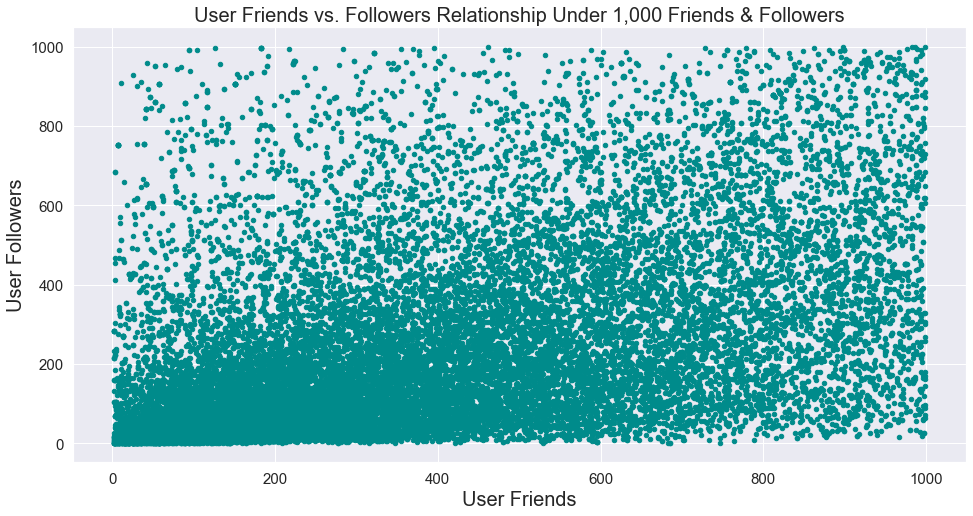

In [306]:
rr = dff[['user.friends_count', 'user.followers_count']]

rr = rr[rr['user.friends_count'] > 1]
rr = rr[rr['user.friends_count'] < 1000]

rr = rr[rr['user.followers_count'] > 1]
rr = rr[rr['user.followers_count'] < 1000]

print("Row Count: {}".format(len(rr)))

# ax = rr.plot(x='user.friends_count', y='user.followers_count', figsize=(16, 8))
ax = rr.plot.scatter(x='user.friends_count', y='user.followers_count', figsize=(16, 8), color=COLOR3)
ax.set_title('User Friends vs. Followers Relationship Under 1,000 Friends & Followers')
ax.title.set_size(20)
ax.tick_params(labelsize=15)
ax.set_xlabel('User Friends', fontsize=20)
ax.set_ylabel('User Followers',fontsize=20)
plt.show()

Row Count: 15918


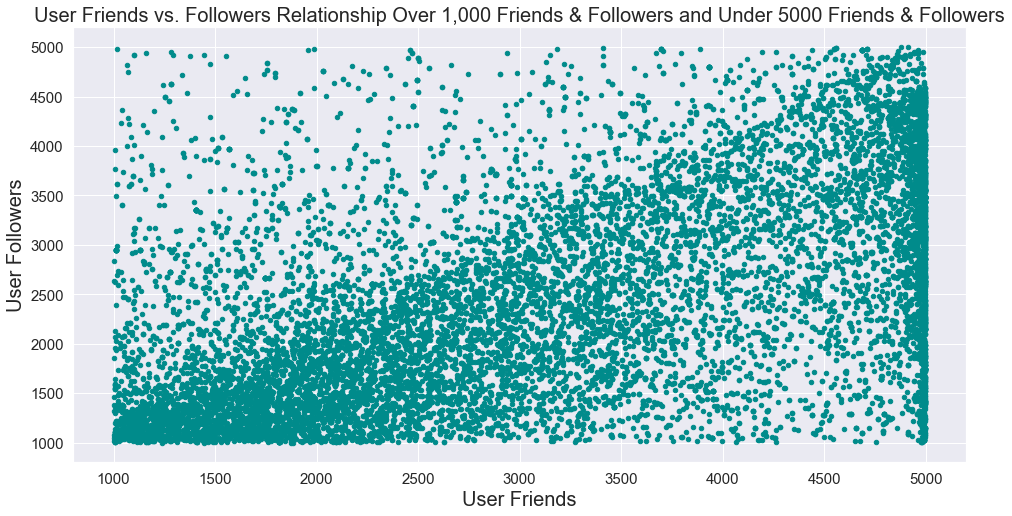

In [431]:
rr = dff[['user.friends_count', 'user.followers_count']]

rr = rr[rr['user.friends_count'] > 1000]
rr = rr[rr['user.friends_count'] < 5000]

rr = rr[rr['user.followers_count'] > 1000]
rr = rr[rr['user.followers_count'] < 5000]

print("Row Count: {}".format(len(rr)))

ax = rr.plot.scatter(x='user.friends_count', y='user.followers_count', figsize=(16, 8), color=COLOR3)
ax.set_title('User Friends vs. Followers Relationship Over 1,000 Friends & Followers and Under 5000 Friends & Followers')
ax.title.set_size(20)
ax.tick_params(labelsize=15)
ax.set_xlabel('User Friends', fontsize=20)
ax.set_ylabel('User Followers',fontsize=20)
plt.show()

Row Count: 9006


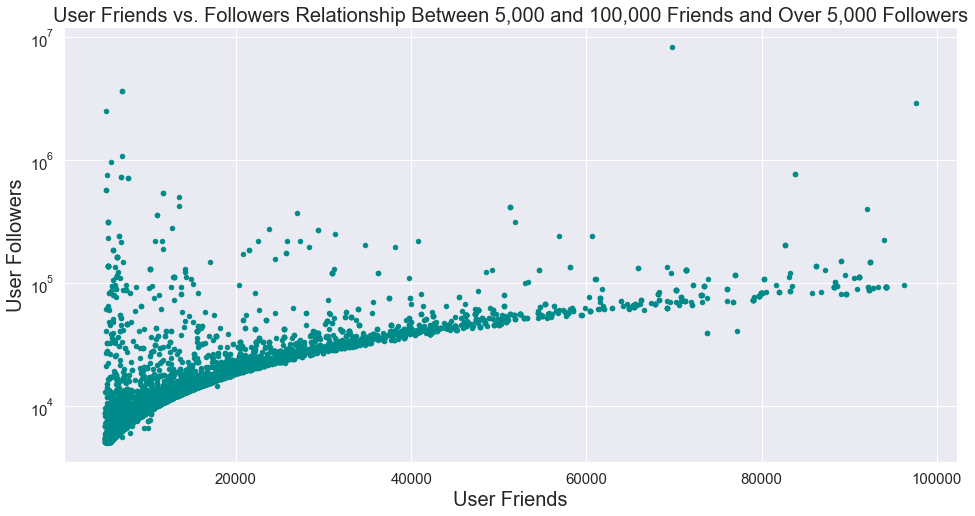

In [312]:
rr = dff[['user.friends_count', 'user.followers_count']]

rr = rr[rr['user.friends_count'] > 5000]
rr = rr[rr['user.friends_count'] < 100000]

rr = rr[rr['user.followers_count'] > 5000]
rr = rr[rr['user.followers_count'] < 100000000]

print("Row Count: {}".format(len(rr)))

ax = rr.plot.scatter(x='user.friends_count', y='user.followers_count',  logy=True, figsize=(16, 8), color=COLOR3)
ax.set_title('User Friends vs. Followers Relationship Between 5,000 and 100,000 Friends and Over 5,000 Followers')
ax.title.set_size(20)
ax.tick_params(labelsize=15)
ax.set_xlabel('User Friends', fontsize=20)
ax.set_ylabel('User Followers',fontsize=20)
plt.show()

Row Count: 2015


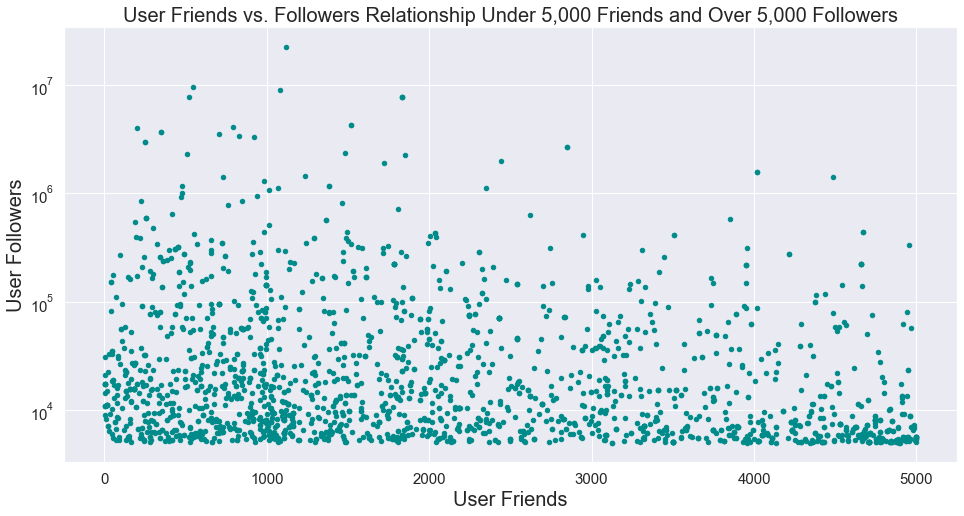

In [310]:
rr = dff[['user.friends_count', 'user.followers_count']]

rr = rr[rr['user.friends_count'] > 1]
rr = rr[rr['user.friends_count'] < 5000]

rr = rr[rr['user.followers_count'] > 5000]
# rr = rr[rr['user.followers_count'] < 10000000]

print("Row Count: {}".format(len(rr)))

ax = rr.plot.scatter(x='user.friends_count', y='user.followers_count', logy=True, figsize=(16, 8), color=COLOR3)
ax.set_title('User Friends vs. Followers Relationship Under 5,000 Friends and Over 5,000 Followers')
ax.title.set_size(20)
ax.tick_params(labelsize=15)
ax.set_xlabel('User Friends', fontsize=20)
ax.set_ylabel('User Followers',fontsize=20)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


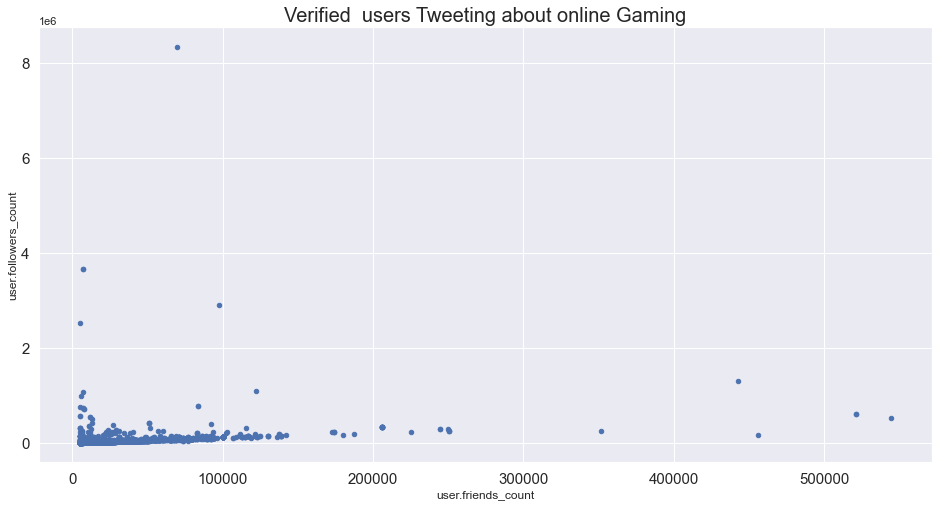

In [99]:
rr = dff[['user.friends_count', 'user.followers_count']]

rr = dff[dff['user.friends_count'] > 5]
rr = rr[rr['user.friends_count'] > 5000]

rr = rr[rr['user.followers_count'] > 5]
rr = rr[rr['user.followers_count'] > 5000]
# ax = rr.plot(x='user.friends_count', y='user.followers_count', figsize=(16, 8))
ax = rr.plot.scatter(x='user.friends_count', y='user.followers_count', figsize=(16, 8))
ax.set_title('Verified  users Tweeting about online Gaming')
ax.title.set_size(20)
ax.tick_params(labelsize=15)
# ax.set_xlabel('Verified Status', fontsize=20)
# ax.set_ylabel('Number of Users',fontsize=20)
plt.show()

<AxesSubplot:>

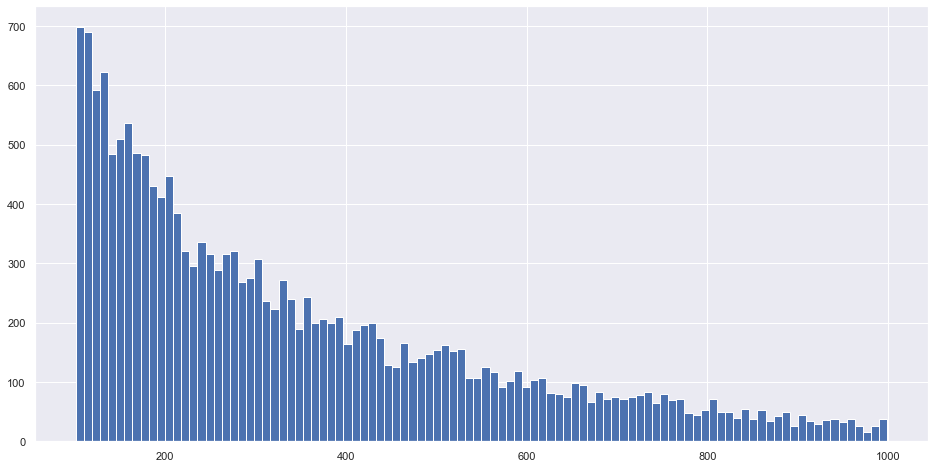

In [101]:
rr = dff[['user.friends_count', 'user.followers_count']]

rr = dff[dff['user.friends_count'] > 5]
rr = rr[rr['user.friends_count'] < 1000]

rr = rr[rr['user.followers_count'] > 100]
rr = rr[rr['user.followers_count'] < 1000]

rr['user.followers_count'].hist(bins=100, figsize=(16,8))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


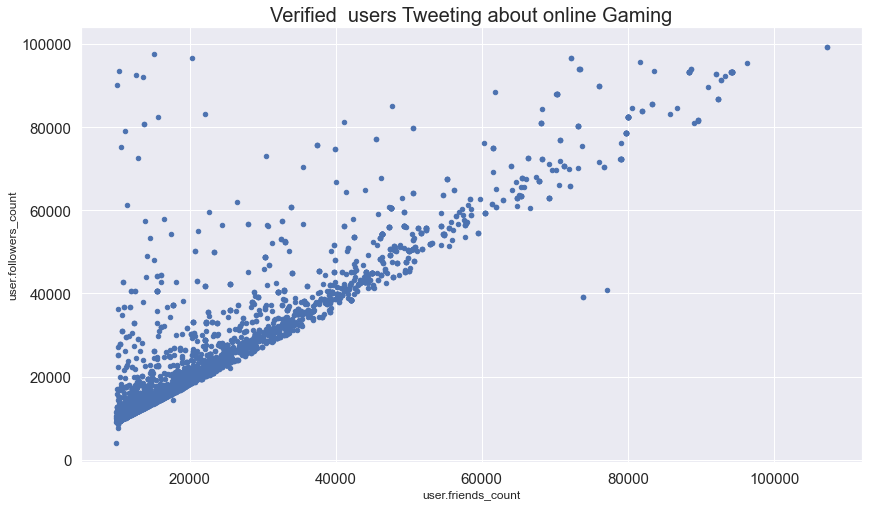

In [102]:
rr = dff[['user.friends_count', 'user.followers_count']]

rr = dff[dff['user.friends_count'] > 5]
rr = rr[rr['user.friends_count'] > 10000]

rr = rr[rr['user.followers_count'] > 5]
rr = rr[rr['user.followers_count'] < 100000]

# ax = rr.plot(x='user.friends_count', y='user.followers_count', figsize=(14, 8))
ax = rr.plot.scatter(x='user.friends_count', y='user.followers_count', figsize=(14, 8))
ax.set_title('Verified  users Tweeting about online Gaming')
ax.title.set_size(20)
ax.tick_params(labelsize=15)
# ax.set_xlabel('Verified Status', fontsize=20)
# ax.set_ylabel('Number of Users',fontsize=20)
plt.show()

<AxesSubplot:>

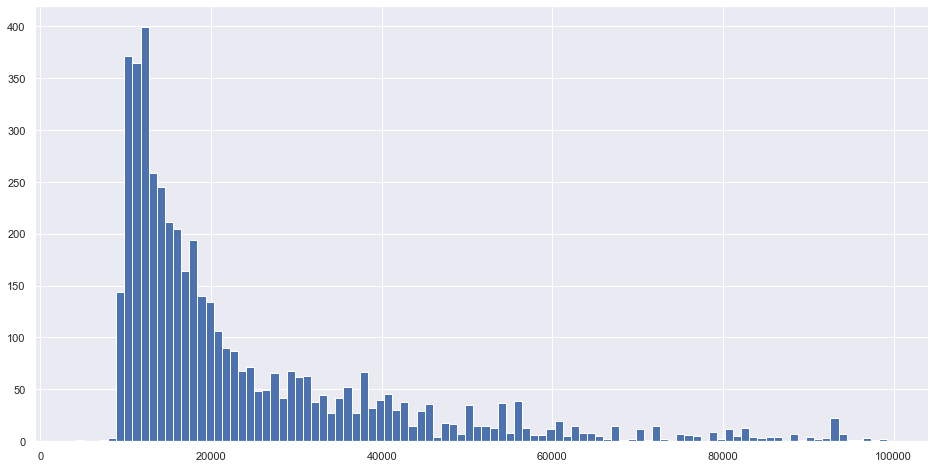

In [103]:
rr['user.followers_count'].hist(bins=100, figsize=(16,8))

In [105]:
# df.head(5)[df[["user.followers_count"]].head(5).apply(lambda x: x>1000, axis=1)]

In [108]:
df.head(5)['user.followers_count']

0       0
1    4888
2    6589
3     600
4       1
Name: user.followers_count, dtype: int64

In [109]:
dff[dff["user.followers_count"] > 10]

,lang,created_at,text,user.id_str,user.name,user.screen_name,user.created_at,user.statuses_count,user.location,user.verified,user.followers_count,user.friends_count,user.listed_count,user.ratio
0,en,Fri Aug 14 15:31:42 +0000 2020,RT @deenie7940: I can’t figure out why Biden picked Kamala https://t.co/Gv78lcNqb7,2734489565,Linda Hamilton⭐💙💙🙏🙏 for Rush,LindaFannyham,Tue Aug 05 21:26:28 +0000 2014,42433,Tennessee,Not Verified,4888,5094,1,0.9596
1,en,Fri Aug 14 15:31:43 +0000 2020,"RT @FordOConnell: Spot on @HeyTammyBruce: \r\n\r\n""Hiding Mr. Biden in a basement has been absurdly accepted by the media. Unable to toss Ms. Har…",796078969,Holly,HollyAverys,Sat Sep 01 13:22:15 +0000 2012,24333,NaN,Not Verified,6589,6639,2,0.9925
2,en,Fri Aug 14 15:31:43 +0000 2020,RT @kylegriffin1: Donald Trump and Melania Trump have requested vote-by-mail ballots ahead of Florida's primary election.\r\nhttps://t.co/VCqd…,1025102106,Birdie,longviewsky,Thu Dec 20 22:01:21 +0000 2012,42015,united states,Not Verified,600,653,4,0.9188
4,en,Fri Aug 14 15:31:43 +0000 2020,Americans Elected them to destroy American Institutions&amp;\r\nEverything America Is Proud Of.\r\nIt Is The Fault of the Vot… https://t.co/OaasAZN8P6,233660838,"Sue Jones, MD",bbubbis,Mon Jan 03 20:17:05 +0000 2011,23823,"Cos Cob ,CT",Not Verified,68,43,15,1.5814
5,en,Fri Aug 14 15:31:43 +0000 2020,RT @4everNeverTrump: I'm not sure what worse...\r\n\r\nThat he intended to cripple the USPS or he didn't know that removing mail-sorting machines…,4842055425,Kathleen Murphy,ktmurph1,Sun Jan 24 14:17:49 +0000 2016,41106,"Reisterstown, MD",Not Verified,912,1404,0,0.6496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68595,en,Fri Aug 14 18:10:04 +0000 2020,"RT @SimonMarksFSN: My ""American Week"" for @EddieMair's Friday night programme on @LBC: As Biden chooses Harris, Trump traffics in yet more…",2837061833,Japanne,Annewanai,Sun Oct 19 10:59:04 +0000 2014,73338,NaN,Not Verified,438,2046,6,0.2141
68597,en,Fri Aug 14 18:10:04 +0000 2020,RT @GrrrGraphics: #Kamala went over like a lead balloon... One-Third of Black Voters Say Biden’s VP Announcement Makes Them Less Likely to…,1228779547652493312,Meme America GIF Again🇺🇸,GifAgain,Sat Feb 15 20:34:16 +0000 2020,6067,United States,Not Verified,252,713,0,0.3534
68598,en,Fri Aug 14 18:10:04 +0000 2020,RT @RepGosar: The walls are closing in on the Obama-Biden operation to spy on ⁦@realDonaldTrump⁩‘s campaign https://t.co/gblOlU4ANW,1020101544543440897,Emkayoh,Emkayoh1,Fri Jul 20 00:22:15 +0000 2018,70654,Down south!,Not Verified,3511,3702,1,0.9484
68599,en,Fri Aug 14 18:10:04 +0000 2020,RT @GrrrGraphics: #Kamala went over like a lead balloon... One-Third of Black Voters Say Biden’s VP Announcement Makes Them Less Likely to…,904987818,@Col. Walter E. Kurtz,GrampTorino,Fri Oct 26 00:47:37 +0000 2012,176528,NaN,Not Verified,3301,4977,0,0.6633


In [115]:
dff.sort_values(ascending=False, by=['user.followers_count'])

,lang,created_at,text,user.id_str,user.name,user.screen_name,user.created_at,user.statuses_count,user.location,user.verified,user.followers_count,user.friends_count,user.listed_count,user.ratio
35837,en,Fri Aug 14 16:51:08 +0000 2020,President Trump managed to pull off a rare victory for U.S. diplomacy in the Middle East ahead of his Nov. 3 re-ele… https://t.co/b8VHZL4aly,1652541,Reuters,Reuters,Tue Mar 20 17:46:05 +0000 2007,570296,Around the world,Verified,22233504,1117,120837,19904.6589
11355,en,Fri Aug 14 15:59:32 +0000 2020,Former President Obama says that President Trump is trying to “actively kneecap the Postal Service” to affect mail-… https://t.co/GP2IBK8rkg,6017542,Breaking News,BreakingNews,Sun May 13 23:06:45 +0000 2007,105099,"NYC, LA, London",Verified,9576420,546,84856,17539.2308
50205,en,Fri Aug 14 17:24:56 +0000 2020,US postal service warning renews fears millions of votes could be uncounted https://t.co/dWVMUkZ14h,87818409,The Guardian,guardian,Thu Nov 05 23:49:19 +0000 2009,618287,London,Verified,9031711,1082,61047,8347.2375
25695,en,Fri Aug 14 16:28:46 +0000 2020,Subsequent investigations validated the core findings of the Russia investigation: That Russia attacked the electio… https://t.co/gIf6lzr8df,5392522,NPR,NPR,Sun Apr 22 05:10:15 +0000 2007,203253,NaN,Verified,8328922,69721,66282,119.4607
44921,en,Fri Aug 14 17:12:33 +0000 2020,"RT @sahilkapur: Scoop: Postal workers union National Association of Letter Carriers endorses Joe Biden and Kamala Harris, assailing the Tru…",14173315,NBC News,NBCNews,Tue Mar 18 23:19:17 +0000 2008,268521,"New York, NY",Verified,7720569,1836,43151,4205.1029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50051,en,Fri Aug 14 17:24:34 +0000 2020,RT @NBCNews: BREAKING: Former President Obama says that President Trump is trying to “actively kneecap the Postal Service” to affect mail-i…,1225071586568392704,Gubbie,Kgub14,Wed Feb 05 15:02:39 +0000 2020,881,NaN,Not Verified,1,16,0,0.0625
50348,en,Fri Aug 14 17:25:17 +0000 2020,Alhamdulillah! My FYP got approved by NGIRI(National Grassroot ICT Research Initiative) 2020\r\n\r\nFYP Title: Election S… https://t.co/bjh5AT20il,3029940202,Ahmed Ali Shah,ahmedalishah961,Wed Feb 11 09:16:22 +0000 2015,17,NaN,Not Verified,1,100,0,0.0100
6109,en,Fri Aug 14 15:48:21 +0000 2020,RT @RealDrGina: #Biden’s Disastrous Week Was a Product of His Own Incompetence https://t.co/AjoW8p5shq,1293310383181172738,labiggote,labiggote,Tue Aug 11 22:16:56 +0000 2020,12,NaN,Not Verified,1,7,0,0.1429
31899,en,Fri Aug 14 16:42:20 +0000 2020,Vox Pop: Mahama or Akufo-Addo? Who deserves to win Election 2020? | #Yencomgh https://t.co/7iM8zO8hxC,1004657389004615681,rubywhite1900,rubywhite1900,Thu Jun 07 09:32:41 +0000 2018,3225,NaN,Not Verified,1,38,0,0.0263


## Hashtags

In [440]:
dfht = dff[dff["text"].str.contains("#")]
print("Row Count: {}".format(len(dfht)))

Row Count: 6071


In [441]:
len(dfht)/len(dff)

0.08849725222664392

In [205]:
dfht["hashtags"] = dfht["text"].str.lower().str.findall(r"\B#([a-z0-9]{2,})(?![~!@#$%^&*()=+_`\-\|\/'\[\]\{\}]|[?.,]*\w)")
dfht['hashtags'] = dfht['hashtags'].apply(lambda x: "|".join(x))
dfht

<ipython-input-205-c4a004e0777c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfht["hashtags"] = dfht["text"].str.lower().str.findall(r"\B#([a-z0-9]{2,})(?![~!@#$%^&*()=+_`\-\|\/'\[\]\{\}]|[?.,]*\w)")
<ipython-input-205-c4a004e0777c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfht['hashtags'] = dfht['hashtags'].apply(lambda x: "|".join(x))


,lang,created_at,text,user.id_str,user.name,user.screen_name,user.created_at,user.statuses_count,user.location,user.verified,user.followers_count,user.friends_count,user.listed_count,user.ratio,hashtags
26,en,Fri Aug 14 15:31:46 +0000 2020,live video ...\r\n\r\n#sanfrancisco #news,26813247,Culturally Delicious Magazine,PaulBaidoa,Thu Mar 26 18:32:06 +0000 2009,214112,New Orleans ... San Francisco,Not Verified,3368,4029,534,0.8359,sanfrancisco|news
38,en,Fri Aug 14 15:31:49 +0000 2020,"RT @AllenFrancesMD: 1/3 Wont Get Vaccinated\r\n\r\nPartly #antivaxx craziness, but also completely realistic distrust of Trump/Putin type vaccine…",920383297661931521,Ramona🍑🆘✍️🤛🏽,RamonaFeminist,Tue Oct 17 20:17:32 +0000 2017,208303,The Germany of my mind,Not Verified,3457,4935,1,0.7005,antivaxx
41,en,Fri Aug 14 15:31:49 +0000 2020,FACT: Masks save lives. #LetScienceLead\r\n\r\nhttps://t.co/1EJCpJPbrm,15781769,Physicians for Human Rights,P4HR,Fri Aug 08 19:22:14 +0000 2008,25331,NaN,Verified,23777,1904,929,12.4879,letsciencelead
44,en,Fri Aug 14 15:31:49 +0000 2020,RT @RealDrGina: #Biden’s Disastrous Week Was a Product of His Own Incompetence https://t.co/AjoW8p5shq,1166854250795655168,Trump2020PNW,TrumpPNW,Wed Aug 28 23:25:16 +0000 2019,13895,NaN,Not Verified,859,1251,4,0.6867,biden
59,en,Fri Aug 14 15:31:53 +0000 2020,RT @RealDrGina: #Biden’s Disastrous Week Was a Product of His Own Incompetence https://t.co/AjoW8p5shq,613941136,NativeOne 🇺🇸,1NatOne,Thu Jun 21 02:07:44 +0000 2012,142876,Uranus,Not Verified,6343,6949,54,0.9128,biden
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68591,en,Fri Aug 14 18:10:02 +0000 2020,RT @Jim_Jordan: Kevin Clinesmith:\r\n\r\n-Worked for Peter Strzok.\r\n-Deliberately doctored #FISA evidence.\r\n-Bragged about being part of the “resis…,1236316948742504448,Jane,Jane69698176,Sat Mar 07 15:45:14 +0000 2020,7194,NaN,Not Verified,45,58,0,0.7759,fisa
68594,en,Fri Aug 14 18:10:03 +0000 2020,RT @Jim_Jordan: Kevin Clinesmith:\r\n\r\n-Worked for Peter Strzok.\r\n-Deliberately doctored #FISA evidence.\r\n-Bragged about being part of the “resis…,234461220,Jon Troxler,Fatdaddype,Wed Jan 05 18:28:05 +0000 2011,9108,NaN,Not Verified,120,734,3,0.1635,fisa
68597,en,Fri Aug 14 18:10:04 +0000 2020,RT @GrrrGraphics: #Kamala went over like a lead balloon... One-Third of Black Voters Say Biden’s VP Announcement Makes Them Less Likely to…,1228779547652493312,Meme America GIF Again🇺🇸,GifAgain,Sat Feb 15 20:34:16 +0000 2020,6067,United States,Not Verified,252,713,0,0.3534,kamala
68599,en,Fri Aug 14 18:10:04 +0000 2020,RT @GrrrGraphics: #Kamala went over like a lead balloon... One-Third of Black Voters Say Biden’s VP Announcement Makes Them Less Likely to…,904987818,@Col. Walter E. Kurtz,GrampTorino,Fri Oct 26 00:47:37 +0000 2012,176528,NaN,Not Verified,3301,4977,0,0.6633,kamala


In [231]:
trump = ['trump', 'djt', 'donald']
biden = ['biden', 'joe']
pence = ['pence', 'mike']
kamala = ['kamala', 'harris']

### More mentions of Biden in #s but more mentions of trump overall in text 

In [232]:
dfhtt = dfht[dfht.text.str.lower().str.contains('|'.join(trump))]
print("Hashtag Mention Count: {}".format(len(dfhtt)))

dftxtt = dff[dff.text.str.lower().str.contains('|'.join(trump))]
print("Text Mention Count: {}".format(len(dftxtt)))

Row Count: 964
Row Count: 25062


In [233]:
dfhtb = dfht[dfht.text.str.lower().str.contains('|'.join(biden))]
print("Hashtag Mention Count: {}".format(len(dfhtb)))

dftxtb = dff[dff.text.str.lower().str.contains('|'.join(biden))]
print("Text Mention Count: {}".format(len(dftxtb)))

Row Count: 1387
Row Count: 16984


### More mentions of Kamala Harris than Mike Pence

In [234]:
dfhtt = dfht[dfht.text.str.lower().str.contains('|'.join(pence))]
print("Hashtag Mention Count: {}".format(len(dfhtt)))

dftxtt = dff[dff.text.str.lower().str.contains('|'.join(pence))]
print("Text Mention Count: {}".format(len(dftxtt)))

Hashtag Mention Count: 13
Text Mention Count: 871


In [235]:
dfhtb = dfht[dfht.text.str.lower().str.contains('|'.join(kamala))]
print("Hashtag Mention Count: {}".format(len(dfhtb)))

dftxtb = dff[dff.text.str.lower().str.contains('|'.join(kamala))]
print("Text Mention Count: {}".format(len(dftxtb)))

Hashtag Mention Count: 526
Text Mention Count: 7845


In [236]:
dfhtb

,lang,created_at,text,user.id_str,user.name,user.screen_name,user.created_at,user.statuses_count,user.location,user.verified,user.followers_count,user.friends_count,user.listed_count,user.ratio,hashtags
156,en,Fri Aug 14 15:32:05 +0000 2020,#JoeBiden #JoeBidenKamalaHarris #DonaldTrumpBelieves #USElection2020 \r\nPolitics intensifies in US before presidentia… https://t.co/wwr309zukg,1246152078168174593,Swarnabh,Swarnabh8,Fri Apr 03 19:06:36 +0000 2020,394,NaN,Not Verified,10,67,0,0.1493,joebiden|joebidenkamalaharris|donaldtrumpbelieves|uselection2020
243,en,Fri Aug 14 15:32:18 +0000 2020,RT @zeusFanHouse: #Democrats r Trying To Control What #Media Is Allowed To Say About #Biden’s VP pick #KamalaHarris\r\n\r\n#DemocraticParty want…,954845161309253632,Deplorable Pet Lover⭐️⭐️⭐️ TEXT TRUMP 88022 🐾🇺🇸,petluvers4Trump,Sat Jan 20 22:36:41 +0000 2018,209420,USA,Not Verified,54271,54850,34,0.9894,democrats|media|biden|kamalaharris|democraticparty
246,en,Fri Aug 14 15:32:18 +0000 2020,RT @zeusFanHouse: #Democrats r Trying To Control What #Media Is Allowed To Say About #Biden’s VP pick #KamalaHarris\r\n\r\n#DemocraticParty want…,1289951488563871744,SouthernBelle❤️✝️🙏🇺🇸,SouthernBelleU,Sun Aug 02 15:50:02 +0000 2020,6322,NaN,Not Verified,4463,3006,0,1.4847,democrats|media|biden|kamalaharris|democraticparty
668,en,Fri Aug 14 15:33:29 +0000 2020,"RT @BaccarelliAA: So thrilled to hear @JoeBiden and @KamalaHarris quoting my #ColumbiaEHS colleague Jeff Shaman ! ""Over 160,000 dead so far…",1136645681794256896,Meghan Bucher,bucher_meghan,Thu Jun 06 14:47:03 +0000 2019,214,NaN,Not Verified,181,498,0,0.3635,columbiaehs
672,en,Fri Aug 14 15:33:29 +0000 2020,RT @zeusFanHouse: #Democrats r Trying To Control What #Media Is Allowed To Say About #Biden’s VP pick #KamalaHarris\r\n\r\n#DemocraticParty want…,1455286956,The Mighty 200⭐️⭐️⭐️ @JewelsJones1💎,JewelsJones1,Fri May 24 21:32:46 +0000 2013,314038,Hollywood -&- San Francisco,Not Verified,35677,36904,101,0.9668,democrats|media|biden|kamalaharris|democraticparty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68477,en,Fri Aug 14 18:09:46 +0000 2020,"@CNN ""#Trump promotes another birther lie,this time about #Kamala #Harris. Spent years pushing lies about the birth… https://t.co/LF6C59qOUl",114614332,Fernando Ruano Faxas,RuanoFaxas,Tue Feb 16 01:44:50 +0000 2010,104382,United States of America,Not Verified,668,136,593,4.9118,trump|kamala|harris
68533,en,Fri Aug 14 18:09:53 +0000 2020,"RT @RuanoFaxas: @CNN ""#Trump promotes another birther lie,this time about #Kamala #Harris. Spent years pushing lies about the birthplace an…",114614332,Fernando Ruano Faxas,RuanoFaxas,Tue Feb 16 01:44:50 +0000 2010,104383,United States of America,Not Verified,668,136,593,4.9118,trump|kamala|harris
68567,en,Fri Aug 14 18:09:59 +0000 2020,"We’re also seeing a fundraising boost for #scsen since the #BidenHarris2020 ticket announcement. Call me crazy, but… https://t.co/tOsp8VEdKb",1163538505,Rosy Gonzalez Speers,RosyGSpeers,Sat Feb 09 17:25:04 +0000 2013,4275,"Miami, FL —Boston,MA—Dublin,NH",Not Verified,1750,1053,40,1.6619,scsen|bidenharris2020
68597,en,Fri Aug 14 18:10:04 +0000 2020,RT @GrrrGraphics: #Kamala went over like a lead balloon... One-Third of Black Voters Say Biden’s VP Announcement Makes Them Less Likely to…,1228779547652493312,Meme America GIF Again🇺🇸,GifAgain,Sat Feb 15 20:34:16 +0000 2020,6067,United States,Not Verified,252,713,0,0.3534,kamala


In [181]:
dff.dropna(subset=['user.location'])

,lang,created_at,text,user.id_str,user.name,user.screen_name,user.created_at,user.statuses_count,user.location,user.verified,user.followers_count,user.friends_count,user.listed_count,user.ratio
0,en,Fri Aug 14 15:31:42 +0000 2020,RT @deenie7940: I can’t figure out why Biden picked Kamala https://t.co/Gv78lcNqb7,2734489565,Linda Hamilton⭐💙💙🙏🙏 for Rush,LindaFannyham,Tue Aug 05 21:26:28 +0000 2014,42433,Tennessee,Not Verified,4888,5094,1,0.9596
2,en,Fri Aug 14 15:31:43 +0000 2020,RT @kylegriffin1: Donald Trump and Melania Trump have requested vote-by-mail ballots ahead of Florida's primary election.\r\nhttps://t.co/VCqd…,1025102106,Birdie,longviewsky,Thu Dec 20 22:01:21 +0000 2012,42015,united states,Not Verified,600,653,4,0.9188
4,en,Fri Aug 14 15:31:43 +0000 2020,Americans Elected them to destroy American Institutions&amp;\r\nEverything America Is Proud Of.\r\nIt Is The Fault of the Vot… https://t.co/OaasAZN8P6,233660838,"Sue Jones, MD",bbubbis,Mon Jan 03 20:17:05 +0000 2011,23823,"Cos Cob ,CT",Not Verified,68,43,15,1.5814
5,en,Fri Aug 14 15:31:43 +0000 2020,RT @4everNeverTrump: I'm not sure what worse...\r\n\r\nThat he intended to cripple the USPS or he didn't know that removing mail-sorting machines…,4842055425,Kathleen Murphy,ktmurph1,Sun Jan 24 14:17:49 +0000 2016,41106,"Reisterstown, MD",Not Verified,912,1404,0,0.6496
6,en,Fri Aug 14 15:31:43 +0000 2020,The state hopes Georgians use a new online absentee request portal and 3 weeks of early voting.\r\n\r\nCounties hope more… https://t.co/owSUsiv6wR,438843965,stephen fowler,stphnfwlr,Sat Dec 17 02:47:22 +0000 2011,33404,"Atlanta, GA",Verified,6139,1104,214,5.5607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68592,en,Fri Aug 14 18:10:03 +0000 2020,How will Americans’ religious identities impact the 2020 presidential election? Learn more with Gallup’s latest ana… https://t.co/gmSX7GWGQu,7684882,GallupNews,GallupNews,Tue Jul 24 14:45:06 +0000 2007,13193,"Washington, D.C.",Verified,94644,112,3678,845.0357
68593,en,Fri Aug 14 18:10:03 +0000 2020,"RT @politico: What do voters need to know about Kamala Harris, the woman who sits on the cusp of breaking one of the highest glass ceilings…",54289927,Muniba Kamal,MunibaKamal,Mon Jul 06 18:32:49 +0000 2009,129492,"Karachi, Pakistan",Not Verified,14371,1701,61,8.4486
68597,en,Fri Aug 14 18:10:04 +0000 2020,RT @GrrrGraphics: #Kamala went over like a lead balloon... One-Third of Black Voters Say Biden’s VP Announcement Makes Them Less Likely to…,1228779547652493312,Meme America GIF Again🇺🇸,GifAgain,Sat Feb 15 20:34:16 +0000 2020,6067,United States,Not Verified,252,713,0,0.3534
68598,en,Fri Aug 14 18:10:04 +0000 2020,RT @RepGosar: The walls are closing in on the Obama-Biden operation to spy on ⁦@realDonaldTrump⁩‘s campaign https://t.co/gblOlU4ANW,1020101544543440897,Emkayoh,Emkayoh1,Fri Jul 20 00:22:15 +0000 2018,70654,Down south!,Not Verified,3511,3702,1,0.9484


In [112]:
a = dff["text"].str.findall("dota").to_frame()
a["text"] = a["text"].astype(str)

In [113]:
a[a["text"] != "[]"]

,text


In [107]:
searchfor = ['mmo', 'mmorpg', 'moba', 'MMO', 'MMORPG', 'MOBA', 'Online Games', "Game", "game"]
dff[dff["text"].str.contains('|'.join(searchfor))]

,lang,created_at,text,user.id_str,user.name,user.screen_name,user.created_at,user.statuses_count,user.location,user.verified,user.followers_count,user.friends_count,user.listed_count,user.ratio
20940,en,Fri Aug 14 16:18:09 +0000 2020,IT'S GREAT WHEN COMMONSENSE PREVAILS https://t.co/6IIXO3kQ7A,1176928032327700480,Joseph Cosentino,JosephCosentin9,Wed Sep 25 18:35:08 +0000 2019,1492,NaN,Not Verified,144,220,0,0.6545
23151,en,Fri Aug 14 16:22:48 +0000 2020,"RT @RhondaFurin: The Democratic Disasters are attempting to hold on to this state, but WAKE UP CALIFORNIA is Happening . RED WAVE of COMMON…",1099910409350303744,God Is,Trumpian6,Mon Feb 25 05:54:11 +0000 2019,3566,"San Diego, CA",Not Verified,21,31,0,0.6774


In [116]:
dff.iloc[110]

lang                                                                                                                                                                    en
created_at                                                                                                                                  Fri Aug 14 15:31:59 +0000 2020
text                    It really irritates me that it takes @BBCNews three paragraphs to say this nonsense is NOT TRUE. \r\n\r\n@realDonaldTrump… https://t.co/o6DmuPcmGV
user.id_str                                                                                                                                                       50623027
user.name                                                                                                                                                   Gary Callachan
user.screen_name                                                                                                                                 

In [117]:
print(dff.iloc[110]["text"])

It really irritates me that it takes @BBCNews three paragraphs to say this nonsense is NOT TRUE. 

@realDonaldTrump… https://t.co/o6DmuPcmGV


In [126]:
re.findall(r"([#＃]+)([0-9A-Z_]*[A-Z_]+[a-z0-9_üÀ-ÖØ-öø-ÿ]*)", dff.iloc[59]["text"])

[('#', 'Biden')]

0         neutral
1        negative
2        positive
3        positive
4        positive
           ...   
68596     neutral
68597    negative
68598     neutral
68599    negative
68600    positive
Length: 68601, dtype: object

## Location 

In [456]:
dff["user.location"].value_counts()

United States                 2577
USA                           1215
California, USA                796
Florida, USA                   695
Texas, USA                     635
                              ... 
Bodensee - Paris - Vienna        1
Utrechtse Heuvelrug              1
Woburn, MA                       1
fillmore, utah                   1
Churchville, VA                  1
Name: user.location, Length: 12487, dtype: int64

In [550]:
dff.loc[dff['user.location.abbr'].isin(states)]

,lang,created_at,text,user.id_str,user.name,user.screen_name,user.created_at,user.statuses_count,user.location,user.verified,user.followers_count,user.friends_count,user.listed_count,user.ratio,user.ratio.normalized,sentiment,user.location.abbr
0,en,Fri Aug 14 15:31:42 +0000 2020,RT @deenie7940: I can’t figure out why Biden picked Kamala https://t.co/Gv78lcNqb7,2734489565,Linda Hamilton⭐💙💙🙏🙏 for Rush,LindaFannyham,Tue Aug 05 21:26:28 +0000 2014,42433,Tennessee,Not Verified,4888,5094,1,0.9596,-0.0233,neutral,TN
5,en,Fri Aug 14 15:31:43 +0000 2020,RT @4everNeverTrump: I'm not sure what worse...\r\n\r\nThat he intended to cripple the USPS or he didn't know that removing mail-sorting machines…,4842055425,Kathleen Murphy,ktmurph1,Sun Jan 24 14:17:49 +0000 2016,41106,"Reisterstown, MD",Not Verified,912,1404,0,0.6496,-0.0243,positive,MD
6,en,Fri Aug 14 15:31:43 +0000 2020,The state hopes Georgians use a new online absentee request portal and 3 weeks of early voting.\r\n\r\nCounties hope more… https://t.co/owSUsiv6wR,438843965,stephen fowler,stphnfwlr,Sat Dec 17 02:47:22 +0000 2011,33404,"Atlanta, GA",Verified,6139,1104,214,5.5607,-0.0090,positive,GA
8,en,Fri Aug 14 15:31:44 +0000 2020,"RT @ThePlumLineGS: ""We can no longer trust that our federal government will oversee fair elections this November...that means we must organ…",295372047,S Faust,S__Faust,Sun May 08 22:05:12 +0000 2011,22824,Texas,Not Verified,81,292,5,0.2774,-0.0255,positive,TX
10,en,Fri Aug 14 15:31:44 +0000 2020,RT @robovendor: Raheem Kassam has discovered yet another group that is actively working to interfere in the U.S. election in order to swing…,493390391,Proud Deplorable,LoriBlaney,Wed Feb 15 19:07:16 +0000 2012,232960,Massachusetts,Not Verified,11975,11813,56,1.0137,-0.0232,negative,MA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68579,en,Fri Aug 14 18:10:01 +0000 2020,"RT @MZHemingway: Kevin Clinesmith, reportedly pleading guilty today, was the FBI ""Resistance"" figure who worried at the time of Trump's ele…",40740639,One Captain Kidd,OneCaptainKidd,Sun May 17 21:26:59 +0000 2009,32431,"New Orleans, LA",Not Verified,1123,1105,1,1.0163,-0.0231,negative,LA
68583,en,Fri Aug 14 18:10:01 +0000 2020,RT @LeahLitman: #angrytweet: remember the people who portrayed themselves as reasonable &amp; lawyerly by saying that our institutions would sa…,824004742087081985,Loretta Bower,LorettaBower3,Tue Jan 24 21:23:34 +0000 2017,472744,"Lake Havasu City, Az. 86406",Not Verified,1359,4992,15,0.2722,-0.0255,positive,AZ
68588,en,Fri Aug 14 18:10:02 +0000 2020,"Hickenlooper says Teddy is sitting out school for the pandemic, time to pay rent\r\n#2020Election #COpolitics \r\n\r\nhttps://t.co/Y3EfA2Dvy9",783742315282051072,Colorado Politics,colo_politics,Wed Oct 05 18:55:04 +0000 2016,13021,"Colorado, USA",Not Verified,7716,1163,197,6.6346,-0.0056,neutral,CO
68592,en,Fri Aug 14 18:10:03 +0000 2020,How will Americans’ religious identities impact the 2020 presidential election? Learn more with Gallup’s latest ana… https://t.co/gmSX7GWGQu,7684882,GallupNews,GallupNews,Tue Jul 24 14:45:06 +0000 2007,13193,"Washington, D.C.",Verified,94644,112,3678,845.0357,2.6090,positive,WA


In [508]:
tt = 'Louisville, USA ' #"Bodensee - Paris - Vienna"
# tt = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tt).split()

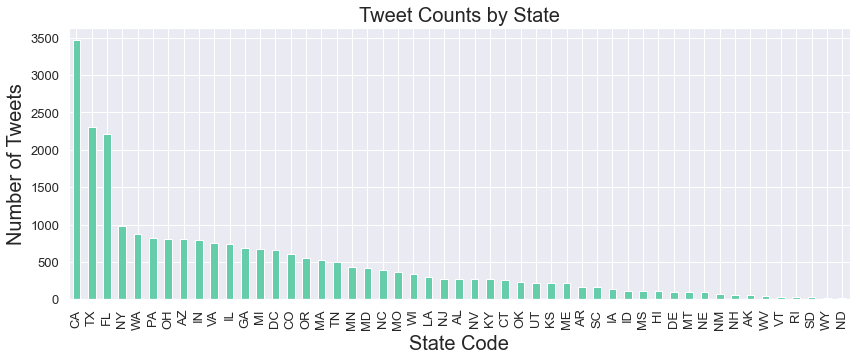

In [549]:
sts = dff.loc[dff['user.location.abbr'].isin(states)]
ax = sts['user.location.abbr'].value_counts().plot.bar(figsize=(14,5), color=COLOR2)

ax.set_title('Tweet Counts by State')
ax.title.set_size(20)
ax.tick_params(labelsize=13)
ax.set_xlabel('State Code', fontsize=20)
ax.set_ylabel('Number of Tweets',fontsize=20)
plt.show()

In [536]:
dff.loc[dff['user.location.abbr'].isin(states)]

,lang,created_at,text,user.id_str,user.name,user.screen_name,user.created_at,user.statuses_count,user.location,user.verified,user.followers_count,user.friends_count,user.listed_count,user.ratio,user.ratio.normalized,sentiment,user.location.abbr
0,en,Fri Aug 14 15:31:42 +0000 2020,RT @deenie7940: I can’t figure out why Biden picked Kamala https://t.co/Gv78lcNqb7,2734489565,Linda Hamilton⭐💙💙🙏🙏 for Rush,LindaFannyham,Tue Aug 05 21:26:28 +0000 2014,42433,Tennessee,Not Verified,4888,5094,1,0.9596,-0.0233,neutral,TN
5,en,Fri Aug 14 15:31:43 +0000 2020,RT @4everNeverTrump: I'm not sure what worse...\r\n\r\nThat he intended to cripple the USPS or he didn't know that removing mail-sorting machines…,4842055425,Kathleen Murphy,ktmurph1,Sun Jan 24 14:17:49 +0000 2016,41106,"Reisterstown, MD",Not Verified,912,1404,0,0.6496,-0.0243,positive,MD
6,en,Fri Aug 14 15:31:43 +0000 2020,The state hopes Georgians use a new online absentee request portal and 3 weeks of early voting.\r\n\r\nCounties hope more… https://t.co/owSUsiv6wR,438843965,stephen fowler,stphnfwlr,Sat Dec 17 02:47:22 +0000 2011,33404,"Atlanta, GA",Verified,6139,1104,214,5.5607,-0.0090,positive,GA
8,en,Fri Aug 14 15:31:44 +0000 2020,"RT @ThePlumLineGS: ""We can no longer trust that our federal government will oversee fair elections this November...that means we must organ…",295372047,S Faust,S__Faust,Sun May 08 22:05:12 +0000 2011,22824,Texas,Not Verified,81,292,5,0.2774,-0.0255,positive,TX
10,en,Fri Aug 14 15:31:44 +0000 2020,RT @robovendor: Raheem Kassam has discovered yet another group that is actively working to interfere in the U.S. election in order to swing…,493390391,Proud Deplorable,LoriBlaney,Wed Feb 15 19:07:16 +0000 2012,232960,Massachusetts,Not Verified,11975,11813,56,1.0137,-0.0232,negative,MA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68579,en,Fri Aug 14 18:10:01 +0000 2020,"RT @MZHemingway: Kevin Clinesmith, reportedly pleading guilty today, was the FBI ""Resistance"" figure who worried at the time of Trump's ele…",40740639,One Captain Kidd,OneCaptainKidd,Sun May 17 21:26:59 +0000 2009,32431,"New Orleans, LA",Not Verified,1123,1105,1,1.0163,-0.0231,negative,LA
68583,en,Fri Aug 14 18:10:01 +0000 2020,RT @LeahLitman: #angrytweet: remember the people who portrayed themselves as reasonable &amp; lawyerly by saying that our institutions would sa…,824004742087081985,Loretta Bower,LorettaBower3,Tue Jan 24 21:23:34 +0000 2017,472744,"Lake Havasu City, Az. 86406",Not Verified,1359,4992,15,0.2722,-0.0255,positive,AZ
68588,en,Fri Aug 14 18:10:02 +0000 2020,"Hickenlooper says Teddy is sitting out school for the pandemic, time to pay rent\r\n#2020Election #COpolitics \r\n\r\nhttps://t.co/Y3EfA2Dvy9",783742315282051072,Colorado Politics,colo_politics,Wed Oct 05 18:55:04 +0000 2016,13021,"Colorado, USA",Not Verified,7716,1163,197,6.6346,-0.0056,neutral,CO
68592,en,Fri Aug 14 18:10:03 +0000 2020,How will Americans’ religious identities impact the 2020 presidential election? Learn more with Gallup’s latest ana… https://t.co/gmSX7GWGQu,7684882,GallupNews,GallupNews,Tue Jul 24 14:45:06 +0000 2007,13193,"Washington, D.C.",Verified,94644,112,3678,845.0357,2.6090,positive,WA


In [540]:
len(df[df["lang"] == "fr"])/len(df)

0.002316429907063716